# Travaux pratiques : Séance 2
## Première partie

Importation des librairies et des modules nécessaires

In [1]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

Importation du dataset et sauvegarde de la partie data/target

In [2]:
cancer = datasets.load_breast_cancer()
x = cancer.data
y = cancer.target

Affichage des dimensions de la partie data

In [3]:
print("Les dimensions de la partie data sont ", x.shape)
print("Il y a donc ", x.shape[0]," tumeurs et ", x.shape[1], " features qui permettent de prédire si elles sont malignes ou bénignes")

Les dimensions de la partie data sont  (569, 30)
Il y a donc  569  tumeurs et  30  features qui permettent de prédire si elles sont malignes ou bénignes


In [4]:
print("Les features sont :", cancer.feature_names)

Les features sont : ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


Description complète du dataset

In [5]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

Division des données en un ensemble d'entrainement et un ensemble de test

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.33, random_state = 42) 

Génération d'un arbre de décision, entrainement sur l'ensemble d'entrainement et affichage de l'arbre

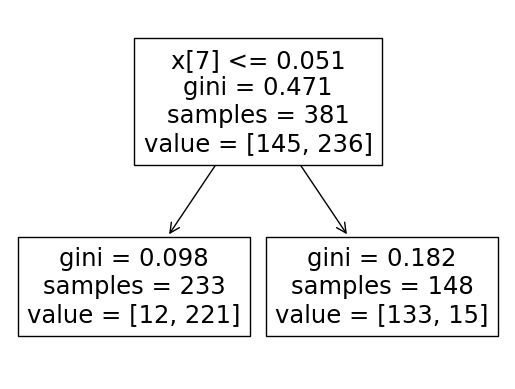

In [7]:
clf = DecisionTreeClassifier(max_leaf_nodes = 2)
clf.fit(x_train, y_train)
plot_tree(clf)
plt.show()

Affichage de la feature sur laquelle se base l'arbre de décision pour classer les données

In [8]:
print("La feature selon laquelle l'arbre de décision sépare les données est :",cancer.feature_names[7])

La feature selon laquelle l'arbre de décision sépare les données est : mean concave points


Calcul des métriques pour évaluer la performance du modèle

In [9]:
y_pred_test = clf.predict(x_test)
accuracy_test = accuracy_score(y_pred_test, y_test)
print("Accuracy de l'ensemble de test : ", accuracy_test)
precision = precision_score(y_pred_test, y_test)
print("Précision : ", precision)
recall = recall_score(y_pred_test, y_test)
print("Recall : ", recall)
f1 = f1_score(y_pred_test, y_test)
print("F1-score : ", f1)
conf_mat = confusion_matrix(y_pred_test, y_test, normalize='all')
print("Matrice de confusion :\n", conf_mat)

Accuracy de l'ensemble de test :  0.8882978723404256
Précision :  0.8925619834710744
Recall :  0.9310344827586207
F1-score :  0.9113924050632911
Matrice de confusion :
 [[0.31382979 0.06914894]
 [0.04255319 0.57446809]]


Calcul de l'accuracy sur l'ensemble d'entrainement

In [10]:
y_pred_train = clf.predict(x_train)
accuracy_train = accuracy_score(y_pred_train, y_train)
print("Accuracy de l'ensemble d'entrainement : ", accuracy_train)

Accuracy de l'ensemble d'entrainement :  0.9291338582677166
